**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля
-4 балла после 06:00 10 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

##### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%load_ext pycodestyle_magic

In [150]:
# %%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def _n_classes(self, X):
        res = np.zeros(X.shape[0])
        distances = metrics.pairwise_distances(X, self._X)
        sorted_indices = np.argpartition(distances, self.n_neighbors, axis=1)
        n_sorted_indices = sorted_indices[:, :self.n_neighbors]
        n_classes = self._y[n_sorted_indices]
        return n_classes

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self._y = y
        self._classes = np.unique(y)

        if self.algorithm == 'brute':
            self._X = X
            self._tree = None
        elif self.algorithm == 'kd_tree':
            self._tree = KDTree(X)
        else:
            raise Exception("Wrong algorithm!")

    def predict(self, X):
        if self.algorithm == 'brute':
            n_classes = self._n_classes(X)

        elif self.algorithm == 'kd_tree':
            distances, ind = self._tree.query(X, k=self.n_neighbors)
            n_classes = self._y[ind]

        most_common_class = stats.mode(n_classes, axis=1)
        result = most_common_class[0].ravel()
        return result

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            n_classes = np.asarray(self._n_classes(X), dtype='int64')

        elif self.algorithm == 'kd_tree':
            distances, ind = self._tree.query(X, k=self.n_neighbors)
            n_classes = np.asarray(self._y[ind], dtype='int64')

        most_common_class = stats.mode(n_classes, axis=1)
        proba = np.apply_along_axis(
            np.bincount,
            axis=1,
            arr=n_classes,
            minlength=self._classes.shape[0])/self.n_neighbors
        return proba

    def score(self, X, y):
        predicted = self.predict(X)
        true_count = np.unique(predicted == y, return_counts=True)[1][-1]

        return true_count / y.shape[0]


**IRIS**

In [151]:
iris = datasets.load_iris()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [153]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [154]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [155]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [156]:
%time clf.predict(X_test)

Wall time: 997 µs


array([0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1])

In [157]:
%time my_clf.predict(X_test)

Wall time: 997 µs


array([0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1])

In [167]:
%time clf.predict_proba(X_test)

Wall time: 945 µs


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [171]:
%time my_clf.predict_proba(X_test)

Wall time: 960 µs


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [172]:
clf.score(X_test, y_test)

1.0

In [173]:
my_clf.score(X_test, y_test)

1.0

Задание 3

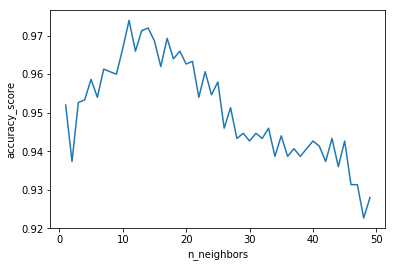

In [31]:
n_neighbors = range(1,50)
accuracies = np.zeros(len(n_neighbors))
iterations = 100

for j in range (iterations):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for nn in n_neighbors:
        knn = MyKNeighborsClassifier(n_neighbors=nn)
        knn.fit(X_train, y_train)
        accuracies[nn-1] += knn.score(X_test, y_test)
        
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_score')
plt.plot(n_neighbors[:50], accuracies[:50]/iterations)

**MNIST**

In [103]:
mnist = fetch_openml('mnist_784')

In [174]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [175]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [176]:
%time clf.fit(X_train, y_train)

Wall time: 217 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [177]:
%time my_clf.fit(X_train, y_train)

Wall time: 30.9 ms


In [178]:
%time clf.predict(X_test)

Wall time: 1.64 s


array(['3', '3', '1', '2', '0', '5', '7', '8', '7', '4', '8', '1', '1',
       '0', '3', '6', '5', '7', '6', '2', '7', '2', '1', '4', '9', '2',
       '4', '1', '1', '5', '5', '5', '8', '4', '6', '6', '9', '8', '0',
       '1', '6', '2', '5', '0', '3', '9', '0', '2', '3', '3', '7', '4',
       '3', '9', '8', '8', '6', '7', '6', '4', '9', '7', '0', '5', '8',
       '5', '7', '4', '3', '7', '9', '9', '7', '8', '2', '7', '1', '6',
       '6', '1', '1', '9', '1', '2', '9', '9', '1', '7', '1', '3', '2',
       '1', '5', '6', '9', '5', '7', '6', '2', '4', '2', '6', '8', '3',
       '4', '6', '5', '2', '5', '0', '4', '0', '7', '6', '0', '6', '8',
       '7', '0', '6', '2', '7', '5', '2', '1', '1', '7', '8', '3', '0',
       '2', '8', '2', '7', '8', '9', '9', '8', '2', '8', '0', '7', '1',
       '8', '2', '2', '1', '1', '1', '3', '2', '2', '8', '6', '4', '9',
       '1', '3', '9', '1', '2', '2', '7', '3', '8', '4', '5', '4', '8',
       '3', '6', '5', '8', '1', '8', '4', '6', '5', '7', '6', '7

In [179]:
%time my_clf.predict(X_test)

Wall time: 1.71 s


array(['3', '3', '1', '2', '0', '5', '7', '8', '7', '4', '8', '1', '1',
       '0', '3', '6', '5', '7', '6', '2', '7', '2', '1', '4', '9', '2',
       '4', '1', '1', '5', '5', '5', '8', '4', '6', '6', '9', '8', '0',
       '1', '6', '2', '5', '0', '3', '9', '0', '2', '3', '3', '7', '4',
       '3', '9', '8', '8', '6', '7', '6', '4', '9', '7', '0', '5', '8',
       '5', '7', '4', '3', '7', '9', '9', '7', '8', '2', '7', '1', '6',
       '6', '1', '1', '9', '1', '2', '9', '9', '1', '7', '1', '3', '2',
       '1', '5', '6', '9', '5', '7', '6', '2', '4', '2', '6', '8', '3',
       '4', '6', '5', '2', '5', '0', '4', '0', '7', '6', '0', '6', '8',
       '7', '0', '6', '2', '7', '5', '2', '1', '1', '7', '8', '3', '0',
       '2', '8', '2', '7', '8', '9', '9', '8', '2', '8', '0', '7', '1',
       '8', '2', '2', '1', '1', '1', '3', '2', '2', '8', '6', '4', '9',
       '1', '3', '9', '1', '2', '2', '7', '3', '8', '4', '5', '4', '8',
       '3', '6', '5', '8', '1', '8', '4', '6', '5', '7', '6', '7

In [110]:
%time clf.predict_proba(X_test)

Wall time: 2.07 s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0.5, 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [111]:
%time my_clf.predict_proba(X_test)

Wall time: 1.94 s


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0.5, 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [112]:
clf.score(X_test, y_test)

0.9657142857142857

In [113]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 4

In [114]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [115]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [116]:
%time clf.fit(X_train, y_train)

Wall time: 27.9 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [117]:
%time my_clf.fit(X_train, y_train)

Wall time: 25.7 s


In [118]:
%time clf.predict(X_test)

Wall time: 1min 8s


array(['2', '9', '8', '7', '1', '6', '6', '3', '8', '3', '4', '3', '7',
       '0', '8', '9', '3', '1', '4', '4', '7', '3', '0', '9', '1', '6',
       '0', '3', '5', '0', '9', '6', '9', '4', '3', '9', '5', '7', '9',
       '8', '7', '4', '4', '0', '0', '3', '6', '8', '1', '7', '3', '0',
       '1', '8', '5', '6', '0', '3', '6', '3', '0', '0', '2', '6', '0',
       '6', '1', '3', '1', '0', '2', '6', '5', '5', '2', '7', '5', '6',
       '9', '8', '2', '3', '1', '9', '3', '8', '1', '4', '9', '1', '4',
       '2', '6', '8', '4', '6', '7', '3', '9', '0', '0', '8', '7', '7',
       '7', '2', '6', '9', '1', '9', '2', '0', '2', '7', '3', '0', '4',
       '1', '8', '3', '9', '8', '4', '0', '4', '4', '4', '1', '7', '5',
       '8', '3', '7', '5', '5', '6', '8', '3', '0', '6', '0', '3', '8',
       '0', '1', '7', '9', '5', '6', '8', '1', '7', '8', '0', '1', '4',
       '3', '0', '1', '5', '6', '5', '4', '0', '1', '1', '2', '1', '6',
       '4', '0', '8', '7', '6', '8', '7', '8', '9', '3', '8', '0

In [119]:
%time my_clf.predict(X_test)

Wall time: 57.2 s


array([['2', '9', '8', '7', '1', '6', '6', '3', '8', '3', '4', '3', '7',
        '0', '8', '9', '3', '1', '4', '4', '7', '3', '0', '9', '1', '6',
        '0', '3', '5', '0', '9', '6', '9', '4', '3', '9', '5', '7', '9',
        '8', '7', '4', '4', '0', '0', '3', '6', '8', '1', '7', '3', '0',
        '1', '8', '5', '6', '0', '3', '6', '3', '0', '0', '2', '6', '0',
        '6', '1', '3', '1', '0', '2', '6', '5', '5', '2', '7', '5', '6',
        '9', '8', '2', '3', '1', '9', '3', '8', '1', '4', '9', '1', '4',
        '2', '6', '8', '4', '6', '7', '3', '9', '0', '0', '8', '7', '7',
        '7', '2', '6', '9', '1', '9', '2', '0', '2', '7', '3', '0', '4',
        '1', '8', '3', '9', '8', '4', '0', '4', '4', '4', '1', '7', '5',
        '8', '3', '7', '5', '5', '6', '8', '3', '0', '6', '0', '3', '8',
        '0', '1', '7', '9', '5', '6', '8', '1', '7', '8', '0', '1', '4',
        '3', '0', '1', '5', '6', '5', '4', '0', '1', '1', '2', '1', '6',
        '4', '0', '8', '7', '6', '8', '7', '8', '9'

In [120]:
%time clf.predict_proba(X_test)

Wall time: 1min 11s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
%time my_clf.predict_proba(X_test)

Wall time: 1min


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
clf.score(X_test, y_test)

0.9742857142857143

In [123]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 5

In [124]:
# seaborn -         Это популярная библиотека визуализации, которая строит графики на основе Matplotlib.
#                   Она предоставляет высокоуровневый интерфейс для рисования привлекательной и информативной статистической графики.
# matplotlib -      Библиотека для построения графиков. 
#                   Позволяет быстро строить такие вещи как plots, histograms, power spectra, bar charts, errorcharts, scatterplots
# train_test_split- Перемешивает случайным образом и разбивает набор входных (X) и выходных/предсказываемых (y) данных
#                   на тренировочный и тестируемый сеты X_train, X_test, y_train, y_test
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Модуль реализует утилиту для построения
#                   составной оценки в виде цепочки преобразований и оценок.
#                   Pipeline функционирует как составной (конвейерный) классификатор
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормализует признаки (стандартизация) 
#                   для набора x: значение z = (x - u) / s, где u - среднее трейна, а s - стандартное отклонение
# ClassifierMixin - Класс, базовый для всех классификаторов в scikit-learn.
#                   Основной метод score возвращает среднюю точность данных теста.
#                   Является родительским для KNeighborsClassifier
# NeighborsBase -   Базовый класс для оценки методом ближайших соседей.
#                   В нем основная инициализация большинства нужных для KNN полей. Метод подбора оптимального алгоритма
#                   исходя из выбранной метрики и тд.
#                   Является родительским для KNeighborsClassifier
# KNeighborsMixin - Класс, отвечающий за сам поиск ближайших соседей.
#                   Основной метод kneighbors возвращает дистанции и индексы для каждой точки.
#                   Является родительским для KNeighborsClassifier
# SupervisedIntegerMixin - класс, который "обучает" модель, используя X в качестве обучающих данных и y в качестве целевых значений.
#                   Является родительским для KNeighborsClassifier